In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from gmplot import gmplot
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
import fiona
from shapely.geometry import mapping, Polygon
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')
os.listdir()
# remove 28.456394, 77.038355

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '.jekyll-cache',
 '4 - clustering based on amenities.ipynb',
 'create-clusters.ipynb',
 'data',
 'DBSCAN-remove-noise.ipynb',
 'docs',
 'gather-data.ipynb',
 'maps',
 'notebooks',
 'README.md',
 'Resume_AakashJ-DS.pdf',
 'shapefile']

In [2]:
city_name = 'delhi-1'
os.listdir('data/')

['amenity',
 'amenity-1',
 'delhi-1-amenity.csv',
 'delhi-1-dbscan.csv',
 'delhi-1-dbscan_modified.csv',
 'delhi-1-overpass.csv',
 'delhi-1-polygon-102.html',
 'delhi-1-polygon-1021.html',
 'delhi-1-polygon-10211.html',
 'delhi-1-polygon-102final.html',
 'delhi-1-reduced_amenity.csv',
 'delhi-1-scatter.html']

In [3]:
# file_name = city_name + '-reduced_amenity.csv'
file_name = "data/" + city_name + '-dbscan_modified.csv'
data = pd.read_csv(file_name)
data = data[['lat', 'lon']]

In [4]:
print(data.shape)
data.head()

(3200, 2)


,lat,lon
0,28.533492,77.151895
1,28.533647,77.152001
2,28.508450,77.166546
3,28.511716,77.163482
4,28.505700,77.175677


In [5]:
X = np.array(data.copy())

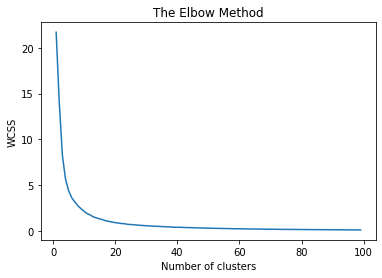

In [6]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []

low, high = 1, 100

for i in range(low, high):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(low, high), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# K-Means

In [7]:
# Fitting K-Means to the dataset
n_clusters = 102

kmeans = KMeans(n_clusters, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

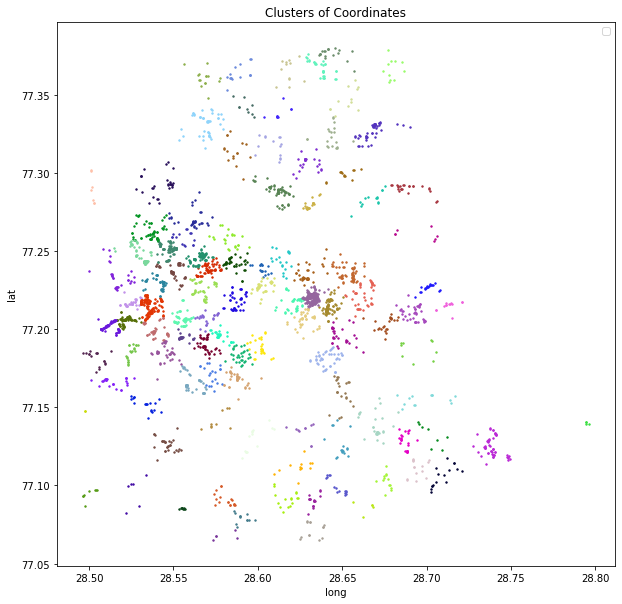

In [8]:
plt.figure(figsize=(10,10))
for i in range(n_clusters):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 2, c = np.random.rand(3,))
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Coordinates')
plt.xlabel('long')
plt.ylabel('lat')
plt.legend()
plt.show()

In [9]:
y_kmeans[:15]

array([16, 16, 62, 62, 53, 62, 62, 62, 62, 62, 62, 82, 82, 82, 53],
      dtype=int32)

In [10]:
X[y_kmeans == 3, 0]

array([28.5247928, 28.5287087, 28.5280037, 28.5271114, 28.5220709,
       28.5225508, 28.5215986, 28.5243179, 28.5277738, 28.5211611,
       28.5239495, 28.5182748, 28.5251992, 28.5182823, 28.5252369,
       28.5303743, 28.5253991, 28.5222089, 28.5255648, 28.5305897,
       28.5253991, 28.5305897, 28.5255648, 28.5215529, 28.5220531,
       28.5220425, 28.5221971, 28.5280801, 28.5262236, 28.5273531,
       28.5275009, 28.5204901, 28.5296934])

In [11]:
# Convex Hull
# point class with x, y as point 
class Point: 
    def __init__(self, x, y): 
        self.x = x 
        self.y = y 

def Left_index(points): 
    ''' Finding the left most point '''
    minn = 0
    for i in range(1,len(points)): 
        if points[i].x < points[minn].x: 
            minn = i 
        elif points[i].x == points[minn].x: 
            if points[i].y > points[minn].y: 
                minn = i 
    return minn 

def orientation(p, q, r): 
    ''' 
    To find orientation of ordered triplet (p, q, r). 
    The function returns following values 
    0 --> p, q and r are colinear 
    1 --> Clockwise 
    2 --> Counterclockwise 
    '''
    val = (q.y - p.y) * (r.x - q.x) - (q.x - p.x) * (r.y - q.y) 

    if val == 0: 
        return 0
    elif val > 0: 
        return 1
    else: 
        return 2

def convexHull(points, n): 
    # There must be at least 3 points 
    if n < 3: 
        return

    # Find the leftmost point 
    l = Left_index(points) 

    hull = [] 
    
    ''' 
    Start from leftmost point, keep moving counterclockwise 
    until reach the start point again. This loop runs O(h) 
    times where h is number of points in result or output. 
    '''
    p = l 
    q = 0
    while(True): 
        # Add current point to result 
        hull.append(p) 

        ''' 
        Search for a point 'q' such that orientation(p, x, 
        q) is counterclockwise for all points 'x'. The idea 
        is to keep track of last visited most counterclock- 
        wise point in q. If any point 'i' is more counterclock- 
        wise than q, then update q. 
        '''
        q = (p + 1) % n 
        
        for i in range(n): 
            
            # If i is more counterclockwise than current q, then update q 
            if(orientation(points[p], points[i], points[q]) == 2): 
                q = i 
        
        ''' 
        Now q is the most counterclockwise with respect to p 
        Set p as q for next iteration, so that q is added to 
        result 'hull' 
        '''
        p = q 

        # While we don't come to first point 
        if(p == l): 
            break

    # Print Result 
    result = []
    for each in hull: 
        result.append([points[each].x, points[each].y]) 
    return result

Aakash Jhawar
https://aakashjhawar.github.io

# Identify most significant clusters
Most significant clusters would have more shops in the market

In [12]:
nodes_in_poly = []
for i in range(n_clusters):
    if len(X[y_kmeans == i]) < 5: continue
    nodes_in_poly.append(len(X[y_kmeans == i]))

In [13]:
# Print nodes in a polygon and count of such polygon
nodes_dict = {i:nodes_in_poly.count(i) for i in set(nodes_in_poly)}
for k, v in nodes_dict.items(): print(k, ":", v)

5 : 2
6 : 1
7 : 2
8 : 2
9 : 5
10 : 1
11 : 1
12 : 3
13 : 6
14 : 3
15 : 5
16 : 3
17 : 2
18 : 3
19 : 3
20 : 4
22 : 2
23 : 2
24 : 2
25 : 1
27 : 1
28 : 2
29 : 1
30 : 5
159 : 1
31 : 2
33 : 2
35 : 1
36 : 1
37 : 2
38 : 2
39 : 4
40 : 2
42 : 4
43 : 1
46 : 2
48 : 1
54 : 1
55 : 1
59 : 1
61 : 1
62 : 1
63 : 3
77 : 1
81 : 1
92 : 1
93 : 1
235 : 1


In [14]:
count_above, count_below = 0, 0
for i in nodes_dict.keys():
    if i>60: count_above +=1
    else: count_below +=1
count_above, count_below

(9, 39)

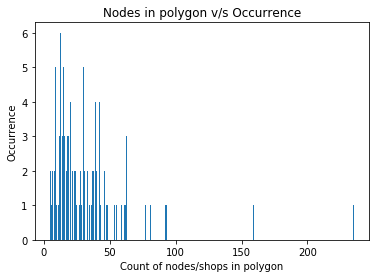

In [15]:
lists = sorted(nodes_dict.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x, y)
plt.xlabel("Count of nodes/shops in polygon")
plt.ylabel("Occurrence")
plt.title("Nodes in polygon v/s Occurrence")
plt.show()

We can see that most significant markets will have many shops in it.

# Convex Hull

In [16]:
def apply_convex_hull(coordinates):
    points = []
    for coordinate in coordinates:
        x, y = coordinate[0], coordinate[1]
        points.append(Point(x,y))
        
    return convexHull(points, len(points))

In [17]:
# put clusters with nodes greater than a threshold into
# most_significant and nodes less than 60 into least_significant

most_significant = []
least_significant = []
for i in range(n_clusters):
    if len(X[y_kmeans == i]) > 5:
        if len(X[y_kmeans == i]) > 45:
            most_significant.append(apply_convex_hull(X[y_kmeans == i]))
        else:
            least_significant.append(apply_convex_hull(X[y_kmeans == i]))
n_clusters, len(most_significant), len(least_significant)

(102, 17, 81)

In [18]:
polygon = []
for i in range(n_clusters):
    if len(X[y_kmeans == i]) < 5: continue
    polygon.append(apply_convex_hull(X[y_kmeans == i]))

In [19]:
poly_coord = []
for i in range(len(polygon)):
#     print(i)
    if polygon[i] is None: continue
    lat = [x[0] for x in polygon[i]]
    long = [x[1] for x in polygon[i]]
    poly_coord.append([lat, long])
    
poly_coord[0]

[[28.579663699999998,
  28.5797419,
  28.5848206,
  28.5872229,
  28.5913816,
  28.5928423,
  28.5932626,
  28.5932298,
  28.5900739,
  28.5849603,
  28.5844433,
  28.5798966],
 [77.2134862,
  77.2132558,
  77.2122083,
  77.2120796,
  77.2120833,
  77.2210516,
  77.2237592,
  77.2238136,
  77.2259246,
  77.22662790000001,
  77.2266538,
  77.22201340000001]]

In [20]:
# convert most_significant, and least_significant into [(lat, lon), (lat, lon), (lat, lon)] format
poly_coord_m = []
for i in range(len(most_significant)):
    if most_significant[i] is None: continue
    lat = [x[0] for x in most_significant[i]]
    long = [x[1] for x in most_significant[i]]
    poly_coord_m.append([lat, long])
    
poly_coord_l = []
for i in range(len(least_significant)):
    if least_significant[i] is None: continue
    lat = [x[0] for x in least_significant[i]]
    long = [x[1] for x in least_significant[i]]
    poly_coord_l.append([lat, long])
    
len(poly_coord_m), len(poly_coord_l)

(17, 81)

# Plot coordinates on maps using gmplot

In [40]:
min_lat, max_lat, min_lon, max_lon = min(data['lat']), max(data['lat']), min(data['lon']), max(data['lon'])
## Create empty map with zoom level 16
mymap = gmplot.GoogleMapPlotter(
    min_lat + (max_lat - min_lat) / 2, 
    min_lon + (max_lon - min_lon) / 2, 
    11)

In [37]:
for i in range(data.shape[0]):
    mymap.scatter([data.iloc[i]['lat']], [data.iloc[i]['lon']], 'red', size=40, marker=False)

In [41]:
for i in range(len(poly_coord)):
    lat = poly_coord[i][0]
    long = poly_coord[i][1]
    mymap.scatter( lat, long, 'red', size = 40, marker = False)
    mymap.polygon(lat, long, 'red')

In [29]:
for i in range(len(poly_coord_l)):    
    lat = poly_coord_l[i][0]
    long = poly_coord_l[i][1]
    mymap.scatter( lat, long, 'yellow', size = 20, marker = False)
    mymap.polygon(lat, long, 'yellow')

In [42]:
file_name = "data/" + city_name  + '-polygon1011' "-" + str(n_clusters) + '.html'
mymap.draw(file_name)
print(file_name)

data/delhi-1-polygon1011-102.html


# Create shapefile

In [26]:
poly_coord[1]

[[28.639281099999998,
  28.646425300000004,
  28.6536021,
  28.654726300000004,
  28.647204,
  28.6438892],
 [77.1299559,
  77.1176773,
  77.11896920000001,
  77.1377879,
  77.1420464,
  77.1387433]]

In [27]:
poly_geometry = []
for elem in poly_coord:
    lat = elem[0]
    lon = elem[1]
    lat_lon = []
    for i in range(len(lat)):
        lat_lon.append([lat[i], lon[i]])
    poly_geometry.append(lat_lon)

In [28]:
schema = {
            'geometry': 'Polygon',
            'properties': {'id': 'int'},
        }

In [29]:
with fiona.open('shapefile/delhi-shapefile.shp', 'w', 'ESRI Shapefile', schema) as c:
    for index, poly_geo in enumerate(poly_geometry):
        poly = Polygon(poly_geo)
    
        schema = {
            'geometry': 'Polygon',
            'properties': {'id': 'int'},
        }
    
        c.write({
            'geometry': mapping(poly),
            'properties': {'id': index},
        })

Aakash Jhawar
https://aakashjhawar.github.io